# Chapter 4 - Training Models

# Linear Regression

Mean Squared Error:
$$
MSE(X, h_\theta) = \frac{1}{m} \times \sum_{i = 1}^{m}{(\theta^{T}x^{(i)} - y^{(i)})^2}
$$

## The Normal Equation

$$
\hat{\theta} = (X^{T}X)^{-1} \cdot X^T \cdot y
$$

In [1]:
import numpy as np

np.random.seed(42)
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # Column Vector
y.shape

(100, 1)

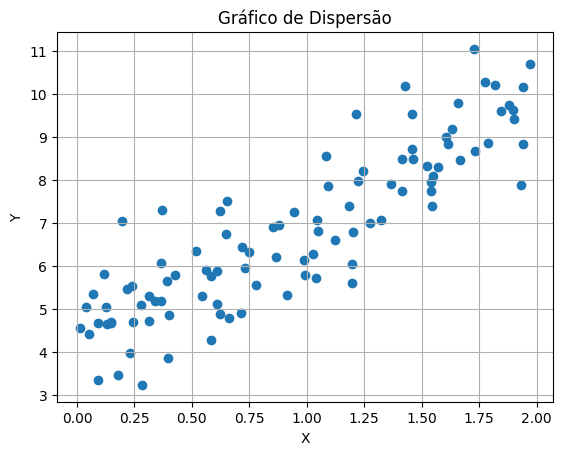

In [2]:
import matplotlib.pyplot as plt

x_flat = X.reshape(-1)
y_flat = y.reshape(-1)

plt.scatter(x_flat, y_flat)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gráfico de Dispersão")
plt.grid(True)
plt.show()

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

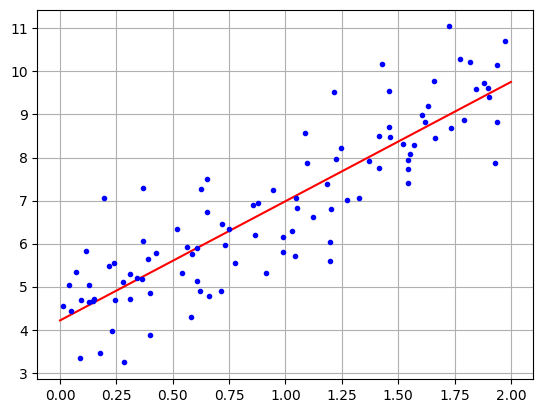

In [5]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.grid(True)
plt.show()

# Gradient Descent

## Batch Gradient Descent

Partial derivatives of the cost function:

$$
\frac{\partial}{\partial \theta_j}MSE(\theta) = \frac{2}{m}\sum_{i = 1}^{m}{(\theta^Tx^{(i)}-y^{(i)})x_{j}^{(i)}}
$$

Gradient vector of the cost function

$$
\nabla_{\theta}MSE(\theta) = \frac{2}{m}X^{T}(X\theta - y)
$$

Gradient descent step

$$
\theta^{s} = \theta - \eta\nabla_{\theta}MSE(\theta)
$$

In [6]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = (2 / m) * (X_b.T @ (X_b @ theta - y))
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

## Stochastic Gradient Descent

In [7]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

theta

array([[4.21076011],
       [2.74856079]])

In [8]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Mini-Batch Gradient Descent

# Polynomial Regression

In [9]:
np.random.seed(42)
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

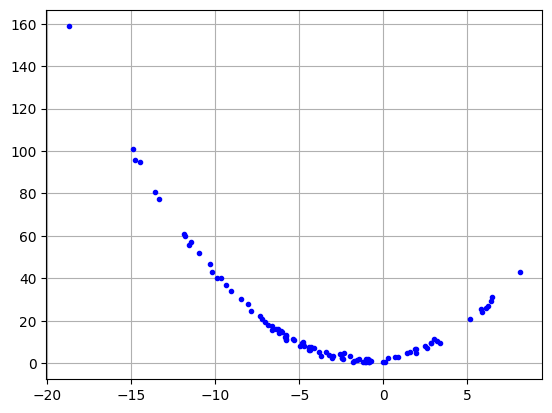

In [10]:
plt.plot(X, y, "b.", label="Predictions")
plt.grid(True)
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.01971508])

In [12]:
X_poly[0]

array([-0.01971508,  0.00038868])

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.87009469]), array([[1.01811444, 0.50512305]]))

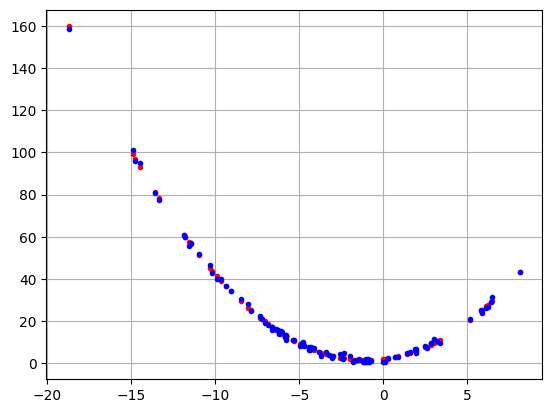

In [14]:
y_predict = lin_reg.predict(X_poly)

plt.plot(X, y_predict, "r.", label="Predictions")
plt.plot(X, y, "b.")
plt.grid(True)
plt.show()

# Learning Curves

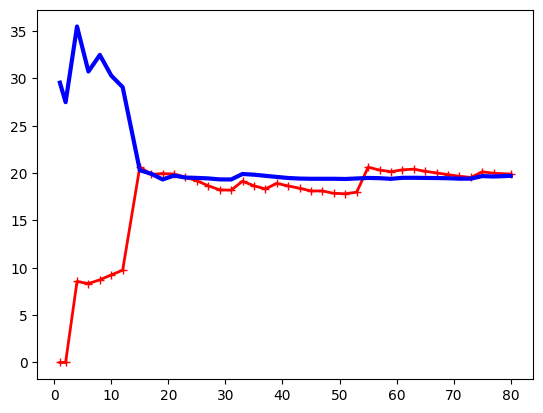

In [15]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.show()

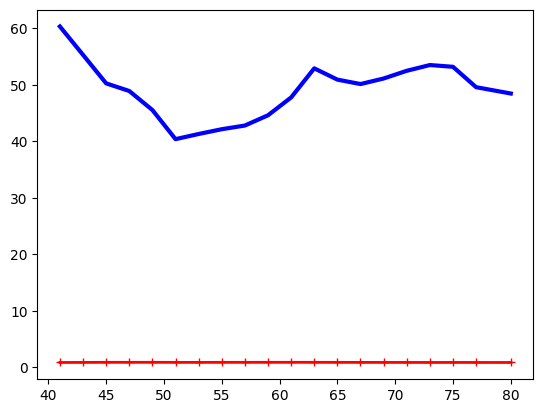

In [16]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes[20:], train_errors[20:], "r-+", linewidth=2, label="train")
plt.plot(train_sizes[20:], valid_errors[20:], "b-", linewidth=3, label="valid")
plt.show()

In [17]:
train_errors[-1], valid_errors[-1], train_sizes[-1]

(np.float64(0.8538476962227113), np.float64(48.47327675660436), np.int64(80))

# Regularized Linear Models

## Ridge Regression

In [18]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([3.66585975])

In [19]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.08748715])

## Lasso Regression

## Elastic Net Regression

## Early Stopping

# Logistic Regression

## Estimating Probabilities

Logistic function

$$
\sigma(t) = \frac{1}{1 + e^{-t}}
$$

## Training and Cost Function

## Decision Boundaries

In [22]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [23]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [24]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [28]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


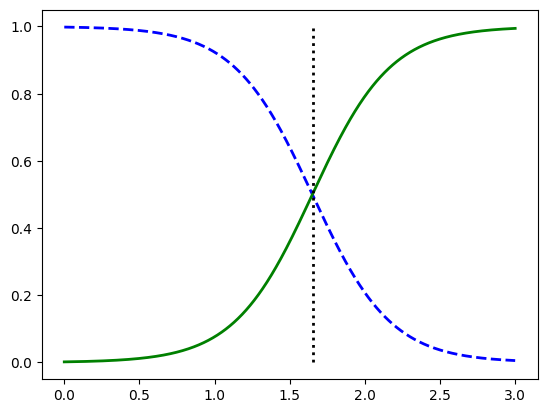

In [40]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] > 0.5][0, 0]

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")
plt.show()

## Softmax Regression

In [43]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,30
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [44]:
softmax_reg.predict([[5, 2]])

array([2])

In [45]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])